### M Sequences

Can I utilize m sequences?

There is an example .wav file available on marasondo site.

It has $f_s = 2400$ and $f_c = 75 Hz$, supposedly is M =3471

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from scipy.fft import fft, fftfreq
import scipy.signal as signal
import scipy.io as io
import os, glob

In [122]:
# Plot both the pressure and PSD for the t, P inputs, defaults to Hahn window
def plot1(t,P,title='time series'):
    # could validated thate dimes are same
    fig, ax = plt.subplots(figsize=(9,4))

    ax.plot(t,P)
    ax.set_title("Pressure ($\mu Pa$)"); ax.set_xlabel("Time [s]")# ; ax.set_ylabel("Pressure [$\mu Pa$]")

    
# Plot both the pressure and PSD for the t, P inputs, defaults to Hahn window
def plot2(t,P,w=True, title='PSD'):
    # could validated thate dimes are same
    print("max/min of P {} / {}".format(P.max(), P.min()))
    fig, (ax,ax1) = plt.subplots(2,1,figsize=(12,6))

    ax.plot(t,P)
    ax.set_title("Pressure ($\mu Pa$)"); ax.set_xlabel("Time [s]")# ; ax.set_ylabel("Pressure [$\mu Pa$]")
    N1=P.shape[0]; DT = t[1] - t[0];  # time delta between points
    if w:
        w1=(1/N1)*np.power(np.cos(np.pi*t/N1),2)
        P=w1*P
    F1=np.abs(fft(P))/N1                # normalized fourier spectrum [Pa / Hz]  (with all frequencies)
    f1=fftfreq(N1, DT)[:N1//2] 
    PSD=2*F1[0:N1//2]*F1[0:N1//2]      # should remove half of the DC energy
    PSD[0]=PSD[0]/2
    PSD_db = 10*np.log10(PSD/(1e-6)**2)
    
    
    ax1.plot(f1[0:], PSD_db)
    ax1.grid('true')
    ax1.set_xlabel("Frequency ")# , ax1.set_ylabel("PSD [dB re $(\mu Pa)^2/Hz$]")
    ax1.set_title(title)
    fig.tight_layout()
    plt.show()
    
# Plot both the pressure and PSD for the t, P inputs, defaults to Hahn window
def plot3(t,P,w=True, fs=250, nperseg=1024*2, title='PSD'):
    # could validated thate dimes are same
    print("max/min of P {} / {}".format(P.max(), P.min()))
    fig, (ax,ax1,ax2) = plt.subplots(3,1,figsize=(12,8))

    ax.plot(t,P)
    ax.set_title("Pressure ($\mu Pa$)"); ax.set_xlabel("Time [s]")# ; ax.set_ylabel("Pressure [$\mu Pa$]")
    N1=P.shape[0]; DT = t[1] - t[0];  # time delta between points
    if w:
        w1=(1/N1)*np.power(np.cos(np.pi*t/N1),2)
        P=w1*P
    F1=np.abs(fft(P))/N1                # normalized fourier spectrum [Pa / Hz]  (with all frequencies)
    f1=fftfreq(N1, DT)[:N1//2] 
    PSD=2*F1[0:N1//2]*F1[0:N1//2]      # should remove half of the DC energy
    PSD[0]=PSD[0]/2
    PSD_db = 10*np.log10(PSD/(1e-6)**2)
    
    
    ax1.plot(f1[0:], PSD_db)
    ax1.grid('true')
    ax1.set_xlabel("Frequency ")# , ax1.set_ylabel("PSD [dB re $(\mu Pa)^2/Hz$]")
    ax1.set_title(title)
    
    fx, tx, Sx = signal.spectrogram(P, fs, nperseg=nperseg)#, nfft=256*8)
    ax2.pcolormesh(tx, fx[:500], Sx[:500,:], shading="auto", norm=colors.LogNorm(vmin=Sx.min(), vmax=Sx.max()))
    ax2.set_xlabel("Time [s]"), ax2.set_ylabel("Frequency ")
    ax2.set_title("Spectrogram of signal")
    
    fig.tight_layout()
    plt.show()
    
def plot_spec(P, fs=250, np=256):
    plt.subplots(figsize=(12,6))
    fx, tx, Sx = signal.spectrogram(P, fs, nperseg=np)#, nfft=256*8)
    plt.pcolormesh(tx, fx[:250], Sx[:250,:], shading="auto", norm=colors.LogNorm(vmin=Sx.min(), vmax=Sx.max()))
    plt.xlabel("Time [s]"), plt.ylabel("Frequency ")
    plt.title("Spectrogram of signal")
    plt.show()

def plot_psd(t,P,w=True, title='PSD'):
    # could validated thate dimes are same

    N1=P.shape[0]; DT = t1[1] - t1[0];  # time delta between points
    if w:
        w1=1/N1*np.power(np.cos(np.pi*t/N1),2)
        P=w1*P
    F1=np.abs(fft(P))/N1                # normalized fourier spectrum [Pa / Hz]  (with all frequencies)
    f1=fftfreq(N1, DT)[:N1//2] 
    PSD=2*F1[1:N1//2]*F1[1:N1//2]      # should remove half of the DC energy
    PSD[0]=PSD[0]/2
    PSD_db = 10*np.log10(PSD/(1e-6)**2)
    fig, ax = plt.subplots(figsize=(8,5));
    ax.plot(f1[1:], PSD_db)
    ax.grid('true'); ax.legend()
    ax.set_xlabel("Frequency "), ax.set_ylabel("PSD [dB re $(\mu Pa)^2/Hz$]")
    ax.set_title(title)
    plt.show()

### Time series

Extracting the exact time from the IRIS data isn't totally trivial.  (Because of Java I'm not sure if the data is in UTC or PST, I suspect PST but I don't know)

Goal - load a pressure file, convert the time information into a true time series

In [100]:
# Loading scripts to get the IRIS data
#
#
def loadn(station, files):
    l = []
    for fname in files:
        print("Loading fname: {}".format(fname))
        l.append(load(station, fname))
    return np.concatenate(l)

def ls(station):
    p="/Users/arnie/Documents/EE/Code/IRIS/data/IRIS/IM/"+station
    return os.listdir(p)
        
def glob(station, wildcard="*"):
    p="/Users/arnie/Documents/EE/Code/IRIS/data/IRIS/IM/"+station
    return glob.glob(p, wildcard)

def load(station, fname):
    filepath="/Users/arnie/Documents/EE/Code/IRIS/data/IRIS/IM/"+station+"/"+fname
    i=0
    p=[]
    for line in open(filepath).readlines():
        if i < 2:
            print("{}".format(line))
            i+=1
        else:
            try:
                p.append(np.float32(line))
            except:
                print("Error processing: {}".format(line))
    return np.array(p)


def load_norm(station, fname):
    filepath="/Users/arnie/Documents/EE/Code/IRIS/data/IRIS/IM/"+station+"/"+fname

    st = None  # start time for time series
    s = 1.0    # Sensitivity, calibrates counts to Pa (raw value is Pa/count)
    fs = 100.0 # Sample rate
    i=0        # N = i - 1
    p=[]
    for line in open(filepath).readlines():
        if i < 2:
            #print("{}".format(line))
            if i==1:
                vals = line.split()
                s = np.float32(vals[6])*1e6
                st = np.datetime64(vals[2]+"T"+vals[3])
                fs = np.float32(vals[4])
            i+=1
        else:
            try:
                p.append(np.float32(line))
                i+=1
            except:
                print("Error processing: {}".format(line))
    
    # Convert pressure to uPa
    p = np.array(p) / s
    # Generate a time series

    td = np.timedelta64(int(1000/fs), 'ms')
    t = np.arange(st, st+(i-2)*td, td)
    print("Normalizing with sensitivity: {:.2f} Pa/count [Note, output is in uPa]".format(s*1e-6))
    print("Generated {} points".format(i-2))
    print("Generating time series start: {}, end: {}, timdelta: {}".format(st, st+(i-2)*td, td))    
    return p,t

In [167]:
station="H11S1"
files = [x for x in ls(station) if x.startswith("2023-03-17") or x.startswith("2023-03-18")] # or x.startswith("2023-03-18") ]

for file in sorted(files):
    print(file)

2023-03-17 22:00:00.001.txt
2023-03-17 22:45:10.003.txt
2023-03-18 00:56:40.003.txt
2023-03-18 03:08:10.003.txt
2023-03-18 05:19:40.003.txt
2023-03-18 05:28:10.003.txt
2023-03-18 05:51:00.003.txt
2023-03-18 05:52:40.002.txt
2023-03-18 05:53:30.002.txt
2023-03-18 05:55:10.002.txt
2023-03-18 05:56:00.002.txt
2023-03-18 05:58:40.002.txt
2023-03-18 05:59:00.002.txt
2023-03-18 05:59:20.002.txt
2023-03-18 06:00:10.002.txt
2023-03-18 06:00:40.002.txt
2023-03-18 06:01:10.002.txt
2023-03-18 06:01:40.002.txt
2023-03-18 06:02:40.002.txt
2023-03-18 06:05:50.002.txt
2023-03-18 06:07:10.002.txt
2023-03-18 06:08:10.002.txt
2023-03-18 06:08:50.002.txt
2023-03-18 06:09:40.002.txt
2023-03-18 06:37:00.001.txt
2023-03-18 06:37:30.001.txt
2023-03-18 06:40:00.001.txt
2023-03-18 06:40:30.001.txt
2023-03-18 06:41:20.001.txt
2023-03-18 06:42:40.001.txt
2023-03-18 06:43:30.001.txt
2023-03-18 06:45:50.001.txt
2023-03-18 06:48:30.001.txt
2023-03-18 06:48:50.001.txt
2023-03-18 07:29:50.0.txt
2023-03-18 07:54:40.00

In [168]:
station="H11N1"
p=[]; t =[]
files = [x for x in ls(station) if x.startswith("2023-03-17") or x.startswith("2023-03-18") ]
for f in sorted(files):
    print("Loading: {}".format(f))
    (p1, t1) = load_norm(station, f)
    p.append(p1)
    t.append(t1)
p=np.concatenate(p)
t=np.concatenate(t)
    

Loading: 2023-03-17 22:00:00.001.txt
Normalizing with sensitivity: 1860.86 Pa/count [Note, output is in uPa]
Generated 677500 points
Generating time series start: 2023-03-17T22:00:00.001, end: 2023-03-17T22:45:10.001, timdelta: 4 milliseconds
Loading: 2023-03-17 22:45:10.003.txt
Normalizing with sensitivity: 1860.86 Pa/count [Note, output is in uPa]
Generated 1972500 points
Generating time series start: 2023-03-17T22:45:10.003, end: 2023-03-18T00:56:40.003, timdelta: 4 milliseconds
Loading: 2023-03-18 00:56:40.003.txt
Normalizing with sensitivity: 1860.86 Pa/count [Note, output is in uPa]
Generated 1972500 points
Generating time series start: 2023-03-18T00:56:40.003, end: 2023-03-18T03:08:10.003, timdelta: 4 milliseconds
Loading: 2023-03-18 03:08:10.003.txt
Normalizing with sensitivity: 1860.86 Pa/count [Note, output is in uPa]
Generated 1972500 points
Generating time series start: 2023-03-18T03:08:10.003, end: 2023-03-18T05:19:40.003, timdelta: 4 milliseconds
Loading: 2023-03-18 05:19

Normalizing with sensitivity: 1860.86 Pa/count [Note, output is in uPa]
Generated 7500 points
Generating time series start: 2023-03-18T14:07:00.003, end: 2023-03-18T14:07:30.003, timdelta: 4 milliseconds
Loading: 2023-03-18 14:07:40.003.txt
Normalizing with sensitivity: 1860.86 Pa/count [Note, output is in uPa]
Generated 7500 points
Generating time series start: 2023-03-18T14:07:40.003, end: 2023-03-18T14:08:10.003, timdelta: 4 milliseconds
Loading: 2023-03-18 14:19:50.003.txt
Normalizing with sensitivity: 1860.86 Pa/count [Note, output is in uPa]
Generated 2500 points
Generating time series start: 2023-03-18T14:19:50.003, end: 2023-03-18T14:20:00.003, timdelta: 4 milliseconds
Loading: 2023-03-18 14:20:10.003.txt
Normalizing with sensitivity: 1860.86 Pa/count [Note, output is in uPa]
Generated 10000 points
Generating time series start: 2023-03-18T14:20:10.003, end: 2023-03-18T14:20:50.003, timdelta: 4 milliseconds
Loading: 2023-03-18 14:21:00.003.txt
Normalizing with sensitivity: 1860.

Normalizing with sensitivity: 1860.86 Pa/count [Note, output is in uPa]
Generated 5000 points
Generating time series start: 2023-03-18T15:11:40.001, end: 2023-03-18T15:12:00.001, timdelta: 4 milliseconds
Loading: 2023-03-18 15:12:10.001.txt
Normalizing with sensitivity: 1860.86 Pa/count [Note, output is in uPa]
Generated 5000 points
Generating time series start: 2023-03-18T15:12:10.001, end: 2023-03-18T15:12:30.001, timdelta: 4 milliseconds
Loading: 2023-03-18 15:14:40.001.txt
Normalizing with sensitivity: 1860.86 Pa/count [Note, output is in uPa]
Generated 2500 points
Generating time series start: 2023-03-18T15:14:40.001, end: 2023-03-18T15:14:50.001, timdelta: 4 milliseconds
Loading: 2023-03-18 15:15:00.001.txt
Normalizing with sensitivity: 1860.86 Pa/count [Note, output is in uPa]
Generated 15000 points
Generating time series start: 2023-03-18T15:15:00.001, end: 2023-03-18T15:16:00.001, timdelta: 4 milliseconds
Loading: 2023-03-18 15:16:10.001.txt
Normalizing with sensitivity: 1860.

Normalizing with sensitivity: 1860.86 Pa/count [Note, output is in uPa]
Generated 2500 points
Generating time series start: 2023-03-18T15:57:00.000, end: 2023-03-18T15:57:10.000, timdelta: 4 milliseconds
Loading: 2023-03-18 15:57:20.0.txt
Normalizing with sensitivity: 1860.86 Pa/count [Note, output is in uPa]
Generated 2500 points
Generating time series start: 2023-03-18T15:57:20.000, end: 2023-03-18T15:57:30.000, timdelta: 4 milliseconds
Loading: 2023-03-18 15:57:50.0.txt
Normalizing with sensitivity: 1860.86 Pa/count [Note, output is in uPa]
Generated 285000 points
Generating time series start: 2023-03-18T15:57:50.000, end: 2023-03-18T16:16:50.000, timdelta: 4 milliseconds
Loading: 2023-03-18 16:16:50.003.txt
Normalizing with sensitivity: 1860.86 Pa/count [Note, output is in uPa]
Generated 1972500 points
Generating time series start: 2023-03-18T16:16:50.003, end: 2023-03-18T18:28:20.003, timdelta: 4 milliseconds
Loading: 2023-03-18 18:28:20.003.txt
Normalizing with sensitivity: 1860.

Normalizing with sensitivity: 1860.86 Pa/count [Note, output is in uPa]
Generated 15000 points
Generating time series start: 2023-03-18T22:13:40.001, end: 2023-03-18T22:14:40.001, timdelta: 4 milliseconds
Loading: 2023-03-18 22:14:50.001.txt
Normalizing with sensitivity: 1860.86 Pa/count [Note, output is in uPa]
Generated 40000 points
Generating time series start: 2023-03-18T22:14:50.001, end: 2023-03-18T22:17:30.001, timdelta: 4 milliseconds
Loading: 2023-03-18 22:18:10.001.txt
Normalizing with sensitivity: 1860.86 Pa/count [Note, output is in uPa]
Generated 10000 points
Generating time series start: 2023-03-18T22:18:10.001, end: 2023-03-18T22:18:50.001, timdelta: 4 milliseconds
Loading: 2023-03-18 22:19:00.0.txt
Normalizing with sensitivity: 1860.86 Pa/count [Note, output is in uPa]
Generated 2500 points
Generating time series start: 2023-03-18T22:19:00.000, end: 2023-03-18T22:19:10.000, timdelta: 4 milliseconds
Loading: 2023-03-18 22:21:40.0.txt
Normalizing with sensitivity: 1860.86

In [170]:
p.shape

(13742500,)

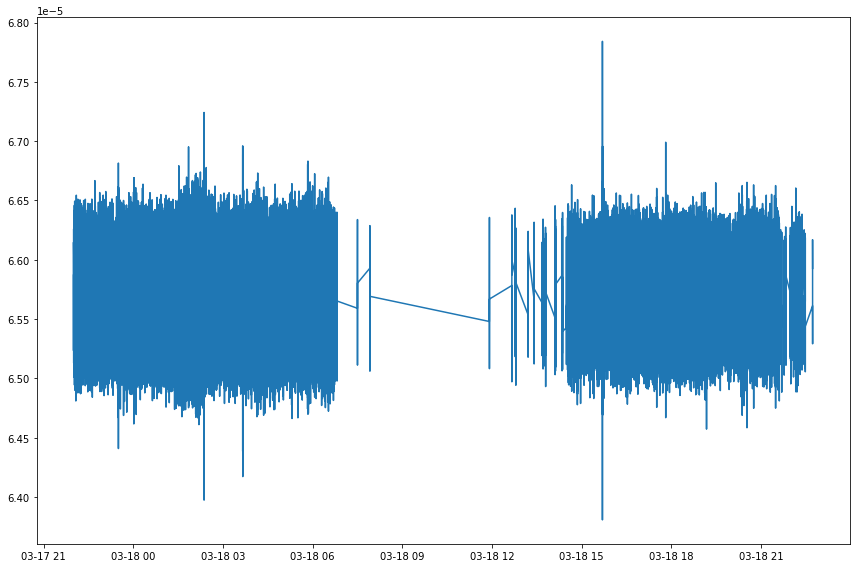

In [171]:
plt.subplots(figsize=(12,8))
plt.plot(t,p)
plt.tight_layout()
plt.show()


In [216]:
# What's going on around 3/18 5?
tstart = np.datetime64("2023-03-18T15:41:00.001")
tend = np.datetime64("2023-03-18T15:42:00.001")
cond1 = t > tstart
cond2 = t < tend
cond3 = np.logical_and(cond1, cond2)
plt.subplots(figsize=(12,8))
plt.plot(t[cond3],p[cond3])
plt.tight_layout()
plt.show()

In [217]:
cond1 = t > tstart
cond2 = t < tend

In [218]:
cond3 = np.logical_and(cond1, cond2)

In [219]:
p[cond3].shape

(7501,)

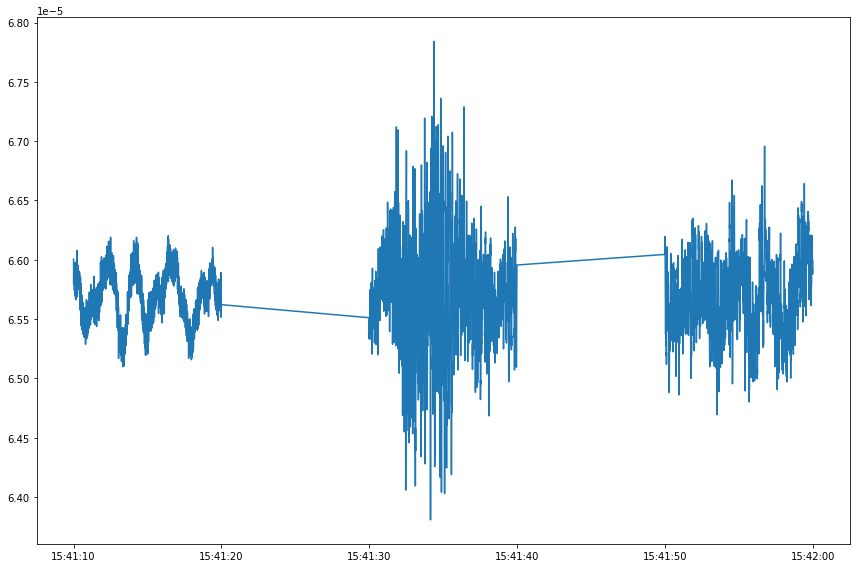

In [220]:
plt.subplots(figsize=(12,8))
plt.plot(t[cond3],p[cond3])
plt.tight_layout()
plt.show()


In [182]:
p.shape

(13742500,)

In [181]:
p[t>tfilter].shape

(5570000,)

In [124]:
# filter the signal, drop out low frequencies:
sos = signal.butter(6, 40, 'hp', fs=250, output='sos')
pf = signal.sosfilt(sos, p)

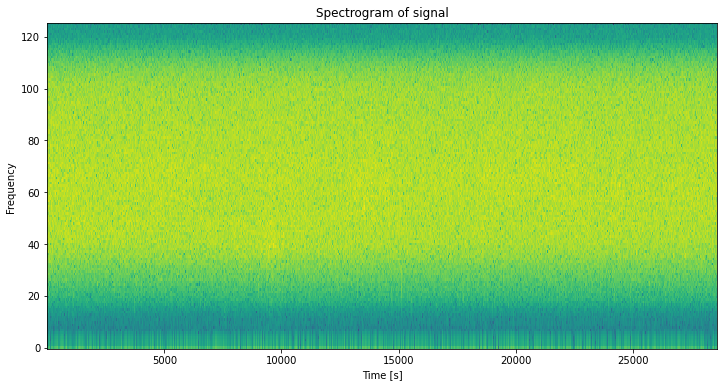

In [125]:
plot_spec(pf)

### M Sequences

- Load and look at real data "rex/msequence/k3471web.wav" taken from 

In [136]:
# load data:
# example msequence can be found /Code/UW/acoustics/rex/msequence/
f1 = open(os.path.join(os.getcwd(),"rex/msequence/s1333.txt"))
f2 = open(os.path.join(os.getcwd(),"rex/msequence/s3471.txt"))
m1 = f1.readline().rstrip(",").split(",")
m2 = f2.readline().rstrip(",").split(",")
f1.close(); f2.close()
len(m2)

1023

In [137]:
m1 = [int(x) if x == '1' else -1 for x in m1]
m2 = [int(x) if x == '1' else -1  for x in m2]

In [141]:
def make_signal(m, Q, fc, fs, phi=0.0):
    #fc=75 Hz;   fs=250 Hz;   
    Ts=Q/fc
    t=np.linspace(0, len(m)*Ts, int(fs*len(m)*Ts + 1))
    # laboriously loop through carrier, and phase shift sequence
    p = np.sin(2*np.pi*fc*t + phi)
    for i in range(t.shape[0]):
        if t[i] > 0:
            sidx = int(np.floor(t[i]/Ts))     # Get the index into the m sequence
            if sidx < len(m):
                p[i] = p[i]*m[sidx]
    return t, p

In [149]:
fc=75;   fs=250;   Ts=2/fc
tm, pm = make_signal(m2, 2, 75, 250, 1.0)

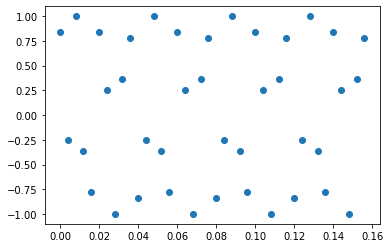

In [150]:
plt.plot(tm[:40],pm[:40], 'o')

In [221]:
#a = signal.correlate(p, pm, mode='full', method='direct')/fs
a = signal.correlate(pm, pm, mode='full', method='direct')/fs

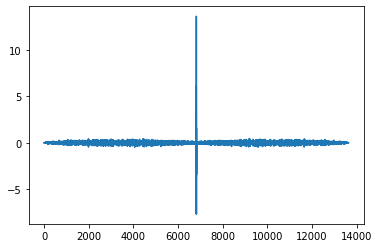

In [223]:
plt.plot(a)

In [110]:
#h = np.flip(p[:1023*32])
h = p[:1023*60]
a = signal.correlate(p, p, mode='full', method='direct')/fs

In [111]:
#t=np.linspace(0,p.shape[0]/fs, p.shape[0])
t2 = np.linspace(-h.shape[0]/fs, (p.shape[0]/fs + h.shape[0]/fs - 1/fs), a.shape[0])

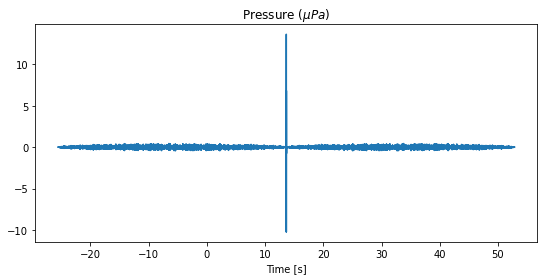

In [112]:
#t0=
plot1(t2,a)

In [86]:
# zoom in on plot around signal


In [87]:
# This is the directory of helper functions from Rex Andrews
os.listdir("rex/msequence")
import rex.msequence.pulse_compressor3 as pc

In [99]:
p3471=pc.make_signal(3471,2,75,2400,1,800000)

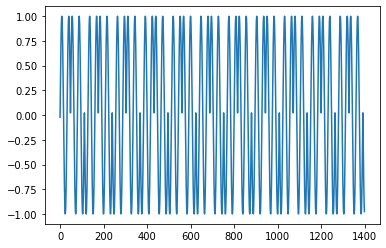

In [106]:
plt.plot(p3471[50000:51400])

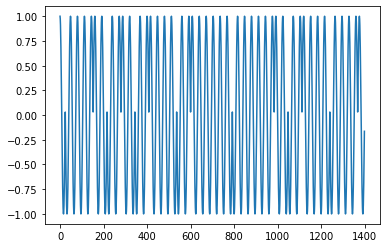

In [109]:
plt.plot(p[1000:2400])

In [159]:
# quick gpa calculation, (Autumn 2020 to Winter 2023)

gpa = []
gpa.append([4,3.2])
gpa.append([4,4])
gpa.append([4,4])
gpa.append([4,3.7])
gpa.append([4,4])
gpa.append([2,4])
gpa.append([4,4])
gpa.append([4,3.9])
gpa.append([4,3.5])
gpa.append([4,4])
gpa.append([3,4])
gpa.append([2,4])

In [160]:
total = np.array([x[0] for x in gpa]).sum()
pts = np.array([x[0]*x[1] for x in gpa]).sum()
print("total graded credits: {}, cum gp: {:.3f}, gpa: {:.4f}".format(total, pts, pts/total))

total graded credits: 43, cum gp: 165.200, gpa: 3.8419
